# Перед тем как мы начнем

В двух словах про Python

In [5]:
print("Hello world!")

Hello world!


In [15]:
# Комментарий
# Назначеие переменных

my_var = 0

In [16]:
if my_var > 3:
    print("This is more than 3!")
else:
    print("Not yet")

Not yet


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [19]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [20]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [1]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [2]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('Homework_attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [11]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [8]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


# Мы проверили датасет на наличие пустых значений. Все ячейки оказалиь заполненными. 


In [10]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Первое на что можно обратить внимание - достаточно низкий Job Satisfaction Rate - 2,71 (среднее) и 3 (медиана)  
#среди всех сотрудников в списке. И примерно такой же Performance Rating - 3,15 (mean) , 3 (mediana). 
#При этом судя по всему в в компании часто повышают сотрудников - медиана Years Since Last Promotion = 1, а среднее 2,1.

In [12]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# Мы говорили, что значимой корреляция считается, если она выше 0,77. В нашей таблице такая корреляция есть между PeformanceRating x PercentSalaryHike. В остальных случаях корреляция вовсе незначительная.

In [15]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['JobRole'].nunique()

9

In [18]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['JobLevel'].nunique()

5

In [16]:
# Теперь посмотрим, что это за роли?
df_hr['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [14]:
"""

В любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,
если у нас всего два класса, один из которых 0, а второй 1. 

Тогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, 
то есть их же количество. 

Разница между работой Sum() и Count() важный момент, запомните это. 

"""

'\n\nВ любой ситуации (не только в Python) можно быстро прикинуть соотношение классов,\nесли у нас всего два класса, один из которых 0, а второй 1. \n\nТогда Count() будет возвращать общий счетчик объектов, а Sum() сумму всех единиц, \nто есть их же количество. \n\nРазница между работой Sum() и Count() важный момент, запомните это. \n\n'

In [20]:
df_hr['JobLevel'].count()

1470

In [12]:
df_hr['MonthlyIncome'].sum()

9559309

In [17]:
# Значит у нас есть 135 объектов со значением GenderID "1" и 311-135 объектов с GenderID знеачением "0"

In [14]:
df_hr['MonthlyRate'].sum()

21040262

In [ ]:
MonthlyRate - месячная ставка, она больше в сумме, чем MonthlyIncome. Это может говорить о том, что в ФОТе остаются деньги,
поскольку фактический доход сотрудников оказывается в разы меньше. Возможно, сотрудники не могут выполнить KPI, это
подтверждается низким Performance Rate. 

In [19]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [13]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64
* object

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [3]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

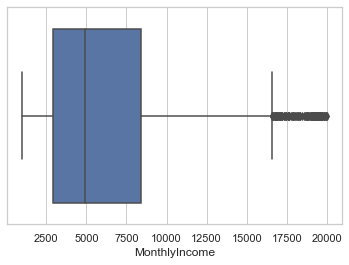

In [8]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [ ]:
# Видим, что распределение явно смещенное, все выбросы справа. 
После медианы значения Monthly Income начинают резко возрастать, очень много выбросов справа (экстремально высокий доход 
у не такого большого кол-ва людей).
# Что это за распределение? 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

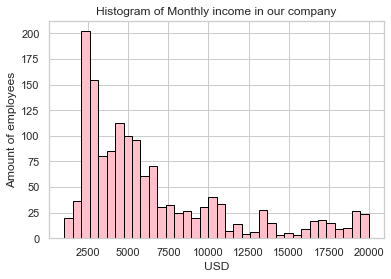

In [10]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'pink', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Monthly income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [7]:
# Видим, что распределение похоже на Лог-нормальное,получается, что наша гипотеза о том, что небольшое количество людей получает 
очень большой доход можно считать верным.

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [11]:
import numpy as np

In [12]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [13]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [ ]:
# Обращает внимание что медиана ниже среднего значения где-то на 1584. 
# О чем это говорит? 

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [14]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [15]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [16]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [ ]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [36]:
# Выделим в отдельные массивы сотрудников с разными Education
df_hr_g1 = df_hr[df_hr['Education'] == 1]
df_hr_g2 = df_hr[df_hr['Education'] == 2]
df_hr_g3 = df_hr[df_hr['Education'] == 3]
df_hr_g4 = df_hr[df_hr['Education'] == 4]
df_hr_g5 = df_hr[df_hr['Education'] == 5]

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


In [37]:
df_hr_g2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2


In [38]:
df_hr_g3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3


In [39]:
df_hr_g4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
22,34,No,Travel_Rarely,419,Research & Development,7,4,Life Sciences,1,28,...,3,80,0,13,4,3,12,6,2,11


In [40]:
df_hr_g5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
52,44,No,Travel_Rarely,1488,Sales,1,5,Marketing,1,68,...,3,80,1,9,2,2,4,3,1,3
56,35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,1,74,...,4,80,1,9,3,2,9,8,1,8
61,38,No,Travel_Frequently,653,Research & Development,29,5,Life Sciences,1,79,...,4,80,0,10,2,3,10,3,9,9
142,38,No,Travel_Rarely,364,Research & Development,3,5,Technical Degree,1,193,...,2,80,0,19,2,3,3,2,2,2
151,35,No,Travel_Rarely,662,Sales,1,5,Marketing,1,204,...,1,80,2,10,3,3,10,8,0,6


In [44]:
print("Count of Education = 1\
 is {} and for Education = 2 is {} and Education = 3 is {} and Education = 4 is {} and Education = 5 is {} ".format(len(df_hr_g1),
                                           len(df_hr_g2), len(df_hr_g3), len(df_hr_g4), len(df_hr_g5)))

Count of Education = 1 is 170 and for Education = 2 is 282 and Education = 3 is 572 and Education = 4 is 398 and Education = 5 is 48 


In [46]:
print("Median of MonthlyIncome for Education = 1 \
is {} and for Education = 2 is {} and Education = 3 is {} and Education = 4 is {} and Education = 5 is {} ".format(np.median(df_hr_g1.MonthlyIncome),np.median(df_hr_g2.MonthlyIncome), np.median(df_hr_g3.MonthlyIncome), 
                                          np.median(df_hr_g4.MonthlyIncome), np.median(df_hr_g5.MonthlyIncome)))

Median of MonthlyIncome for Education = 1 is 3849.0 and for Education = 2 is 4891.5 and Education = 3 is 4762.0 and Education = 4 is 5341.5 and Education = 5 is 6203.0 


<AxesSubplot:xlabel='MonthlyIncome'>

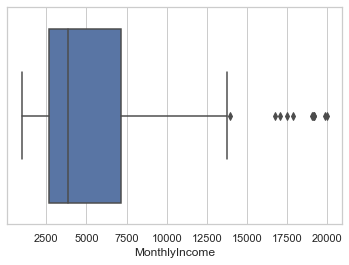

In [51]:
sns.boxplot(x=df_hr_g1["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

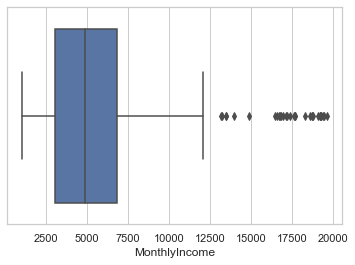

In [52]:
sns.boxplot(x=df_hr_g2["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

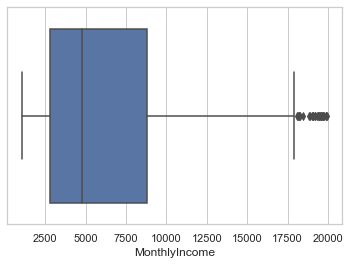

In [53]:
sns.boxplot(x=df_hr_g3["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

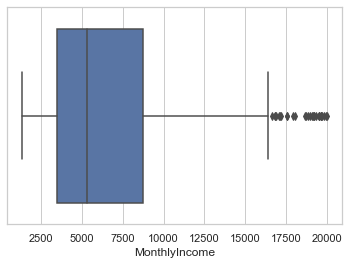

In [54]:
sns.boxplot(x=df_hr_g4["MonthlyIncome"])

Text(0, 0.5, 'Amount of employees')

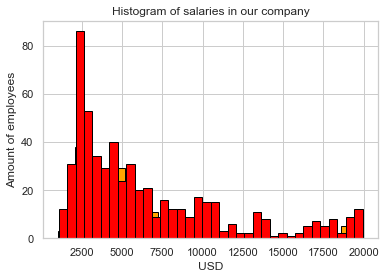

In [64]:

plt.hist(df_hr_g2['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g3['MonthlyIncome'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Text(0, 0.5, 'Amount of employees')

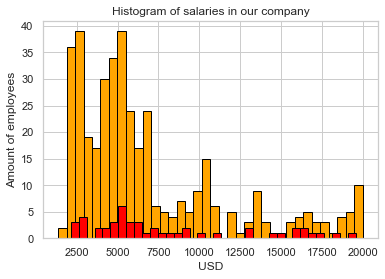

In [63]:

plt.hist(df_hr_g4['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g5['MonthlyIncome'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [67]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [68]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal


In [ ]:
Из боксплотов мы увидели, что аномальные значения зарплат (за пределами усов) есть, а на деле аномально высоких
значений в нашей таблице нет. 

## Оценка абсентеизма - количества отсутствий на рабочем месте

In [ ]:
plt.hist(df_hr['Absences'], color = 'orange', edgecolor = 'black', bins = 20)

Каких-то заментых возмущений не наблюдается, распределение плюс-минус случайное. 

Из метода .describe() выше нам известно, что 75-перцентиль количества отсутствий находится на уровне 15. 

Давайте также посчитаем где лежит 90-й перцентиль. 



In [ ]:
df_hr.Absences.quantile(q=0.9)

Это означает, что 90% сотрудников в выборке имеют менее 18 отсутствий.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого 18 и более отсутствий. 

In [ ]:
df_hr_ab = df_hr[df_hr['Absences'] > 17]
df_hr_ab

Получили 38 человек. У всех у них по 19 или 20 отсутствий. 

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Мы проверили датасет на наличие пустых значений. Все ячейки оказалиь заполненными.
2. Первое на что можно обратить внимание - достаточно низкий Job Satisfaction Rate - 2,71 (среднее) и 3 (медиана) среди всех сотрудников в списке. И примерно такой же Performance Rating - 3,15 (mean) , 3 (mediana). При этом судя по всему в в компании часто повышают сотрудников - медиана Years Since Last Promotion = 1, а среднее 2,1.
3. Мы говорили, что значимой корреляция считается, если она выше 0,7. В нашей таблице такая корреляция есть между PeformanceRating x PercentSalaryHike (0,77 - чем выше зарплата, тем выше перформанс). В остальных случаях корреляция вовсе незначительная.
4. Мы узнали, что в компании существует 9 должностей - 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'.
5. MonthlyRate - месячная ставка, она больше в сумме, чем MonthlyIncome. Это может говорить о том, что в ФОТе остаются деньги, поскольку фактический доход сотрудников оказывается в разы меньше. Возможно, сотрудники не могут выполнить KPI, это подтверждается низким Performance Rating.
6. Видим, что распределение по MonthylIncome явно смещенное, все выбросы справа. После медианы значения Monthly Income начинают резко возрастать, очень много выбросов справа (экстремально высокий доход у не такого большого кол-ва людей).
7. Из истограммы видим, что распределение похоже на Лог-нормальное,получается, что наша гипотеза о том, что небольшое количество людей получает очень большой доход можно считать верным.
8. Также обращаем внимание что медиана ниже среднего значения где-то на 1584. Что тоже подтверждает  тезисы 6 и 7.
9. Посмотрим, сколько в нашей компании человек с разным уровнем образования:
1 'Below College' = 170
2 'College' = 282
3 'Bachelor'= 572
4 'Master' = 398 
5 'Doctor' = 48
10. Посмотрим на медианы зарплат в зависимости от уровня образования. Видим, что медиана зарплат среди сотрудников с уровнем 2 и 3 находятся на одном уровне. Т.е. можем предположить, что в этой компании на самые массовые позиции не так необходимо образование бакалавра. Значительное повышение ЗП происходит после уровня 4 (Магистр) и 5 (Доктор). 
Education = 3849.0 
Education = 4891.5
Education = 4762.0
Education = 5341.5
Education = 6203.0 
11. Если посмотреть на распределение зарплат по уровням образования, то на уровня c 2 по 4 есть много выбросов. Возможно, это сотрудники high-performer, которые выполняют все КПИ и получают свой полный доход + экстра какие-то выплаты.
12. Из боксплотов мы увидели, что аномальные значения зарплат (за пределами усов) есть, но после применения функции anomally-sal мы увидели, что на деле аномально высоких значений в нашей таблице нет.Есть просто высокие значения, но они в пределах 3 среднеквадратических отклонений.  


# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 